<a href="https://colab.research.google.com/github/kaushik654/Deep-Learning---Classification-of-Cat-image-And-Human-image/blob/master/TrafficSign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

Cloning into 'german-traffic-signs'...
remote: Counting objects: 6, done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 0 (delta 0)
Unpacking objects: 100% (6/6), done.


In [0]:
!ls sample_data/

anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
import pickle as pkl

Using TensorFlow backend.


In [0]:
import random
np.random.seed(0)

In [0]:
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [0]:
with open("german-traffic-signs/train.p","rb") as f:
  train_data=pkl.load(f)
with open("german-traffic-signs/test.p","rb") as f:
  test_data=pkl.load(f)
with open("german-traffic-signs/valid.p","rb") as f:
  val_data=pkl.load(f)
X_train,y_train=train_data["features"],train_data["labels"]
X_test,y_test=test_data["features"],test_data["labels"]
X_val,y_val=val_data["features"],val_data["labels"]


In [0]:
train_data.keys()

dict_keys(['coords', 'labels', 'features', 'sizes'])

In [0]:
y_train[200]

41

In [0]:
len(y_train)

34799

In [0]:
import pandas as pd
import random
data=pd.read_csv("german-traffic-signs/signnames.csv")

In [0]:
data.head()

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


In [0]:
x_set=X_train[y_train==0]
random.randint(1,10)
len(x_set)

180

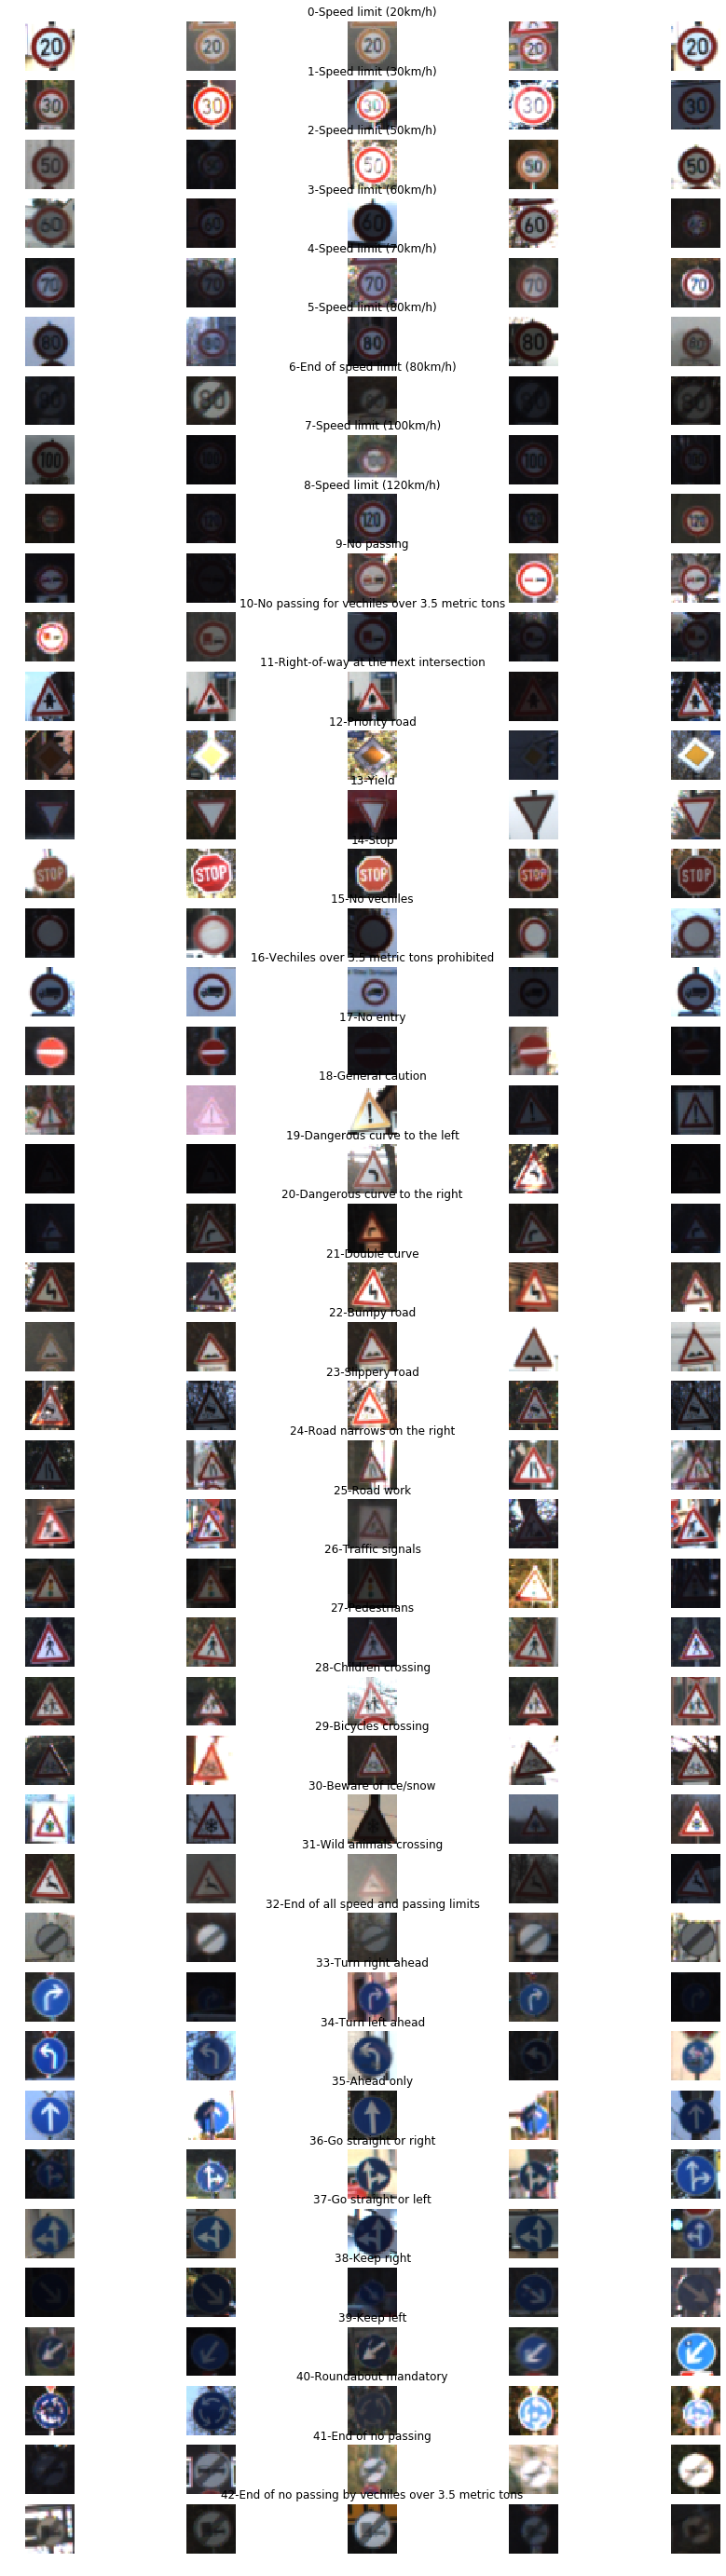

In [0]:
num_of_samples=[]
cols=5
num_class=43
fig,axs=plt.subplots(nrows=num_class,ncols=cols,figsize=(15,50))


for i in range(cols):
  for j,raw in data.iterrows():
    x_selected=X_train[y_train==j]
    axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected)-1)),:,:],cmap=plt.get_cmap("gray"))
    axs[j][i].axis("off")
    if i==2:
      axs[j][i].set_title(str(j)+"-"+raw['SignName'])
      num_of_samples.append(len(x_selected))

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


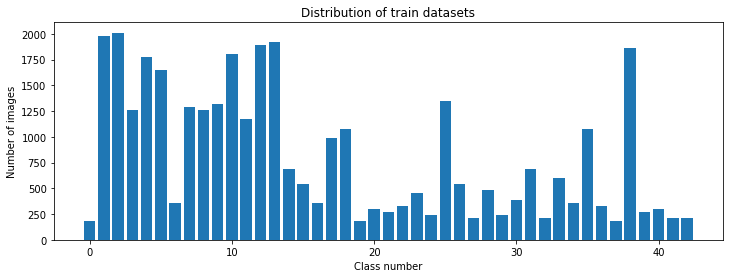

In [0]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0,num_class),num_of_samples)
plt.title("Distribution of train datasets")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

(32, 32, 3)
36


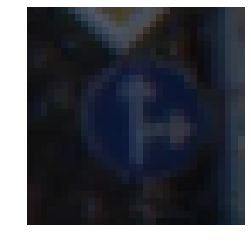

In [0]:
import cv2
plt.imshow(X_train[1000])
plt.axis("off")
print(X_train[1000].shape)
print(y_train[1000])

In [0]:
def grayscale(img):
  img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  return img

(32, 32)


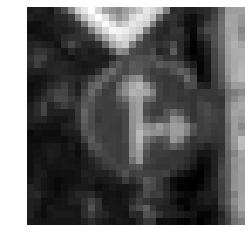

In [0]:
img=grayscale(X_train[1000])
plt.imshow(img,cmap="gray")
plt.axis("off")
print(img.shape)

In [0]:
def equalize(img):
  img=cv2.equalizeHist(img)
  return img

In [0]:
img=equalize(img)

In [0]:
def preprocess(img):
  img=grayscale(img)
  img=equalize(img)
  img=img/255
  return img

In [0]:
X_train=np.array(list(map(preprocess,X_train)))
X_test=np.array(list(map(preprocess,X_test)))
X_val=np.array(list(map(preprocess,X_val)))

(34799, 32, 32)


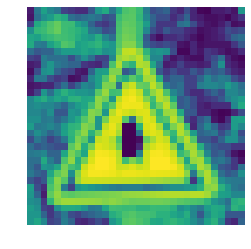

In [0]:
plt.imshow(X_train[random.randint(0,len(X_train)-1)])
plt.axis("off")
print(X_train.shape)
                   

In [0]:
X_train=X_train.reshape(34799,32,32,1)
X_test=X_test.reshape(12630,32,32,1)
X_val=X_val.reshape(4410,32,32,1)

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator(width_shift_range=0.1,
                          height_shift_range=0.1,
                          zoom_range=0.2,
                          shear_range=0.1,
                          rotation_range=10)
datagen.fit(X_train)

In [0]:
y_train=to_categorical(y_train,43)
y_test=to_categorical(y_test,43)
y_val=to_categorical(y_val,43)

In [0]:
def le_net():
  model=Sequential()
  model.add(Conv2D(30,(5,5),input_shape=(32,32,1),activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(15,(3,3),activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add((Dense(500,activation="relu")))
  model.add(Dropout(0.5))
  model.add(Dropout(0.5))
  model.add(Dense(num_class,activation="softmax"))
  model.compile(Adam(lr=0.001),loss="categorical_crossentropy",metrics=["accuracy"])
  return model

In [0]:
lenet=le_net()

In [0]:
history=lenet.fit(X_train,y_train,epochs=50,validation_split=0.1,batch_size=400,verbose=1,shuffle=1)

W0730 11:14:08.922298 139989824788352 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 31319 samples, validate on 3480 samples
Epoch 1/50
31319/31319 [==============================] - 8s 254us/step - loss: 2.8522 - acc: 0.2606 - val_loss: 8.5831 - val_acc: 0.0302
Epoch 2/50
31319/31319 [==============================] - 1s 26us/step - loss: 1.3331 - acc: 0.6048 - val_loss: 12.2063 - val_acc: 0.0293
Epoch 3/50
31319/31319 [==============================] - 1s 25us/step - loss: 0.8238 - acc: 0.7458 - val_loss: 13.5304 - val_acc: 0.0336
Epoch 4/50
31319/31319 [==============================] - 1s 25us/step - loss: 0.6054 - acc: 0.8081 - val_loss: 14.0691 - val_acc: 0.0342
Epoch 5/50
31319/31319 [==============================] - 1s 25us/step - loss: 0.4842 - acc: 0.8474 - val_loss: 14.3884 - val_acc: 0.0342
Epoch 6/50
31319/31319 [==============================] - 1s 25us/step - loss: 0.4030 - acc: 0.8746 - val_loss: 14.6626 - val_acc: 0.0345
Epoch 7/50
31319/31319 [==============================] - 1s 25us/step - loss: 0.3425 - acc: 0.8938 - val_loss: 14.9392 - v